In [58]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from plotly.graph_objects import *
from plotly.offline import init_notebook_mode,iplot
from sklearn.model_selection import train_test_split
import seaborn as sns # for data visualization

import matplotlib.pyplot as plt # to plot charts
init_notebook_mode(connected=True)




In [59]:

df = pd.read_csv('diabet2.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
# Explore missing values
df.isnull().sum()



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:

# Review dataset statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Pairplot of Variables by Outcome')

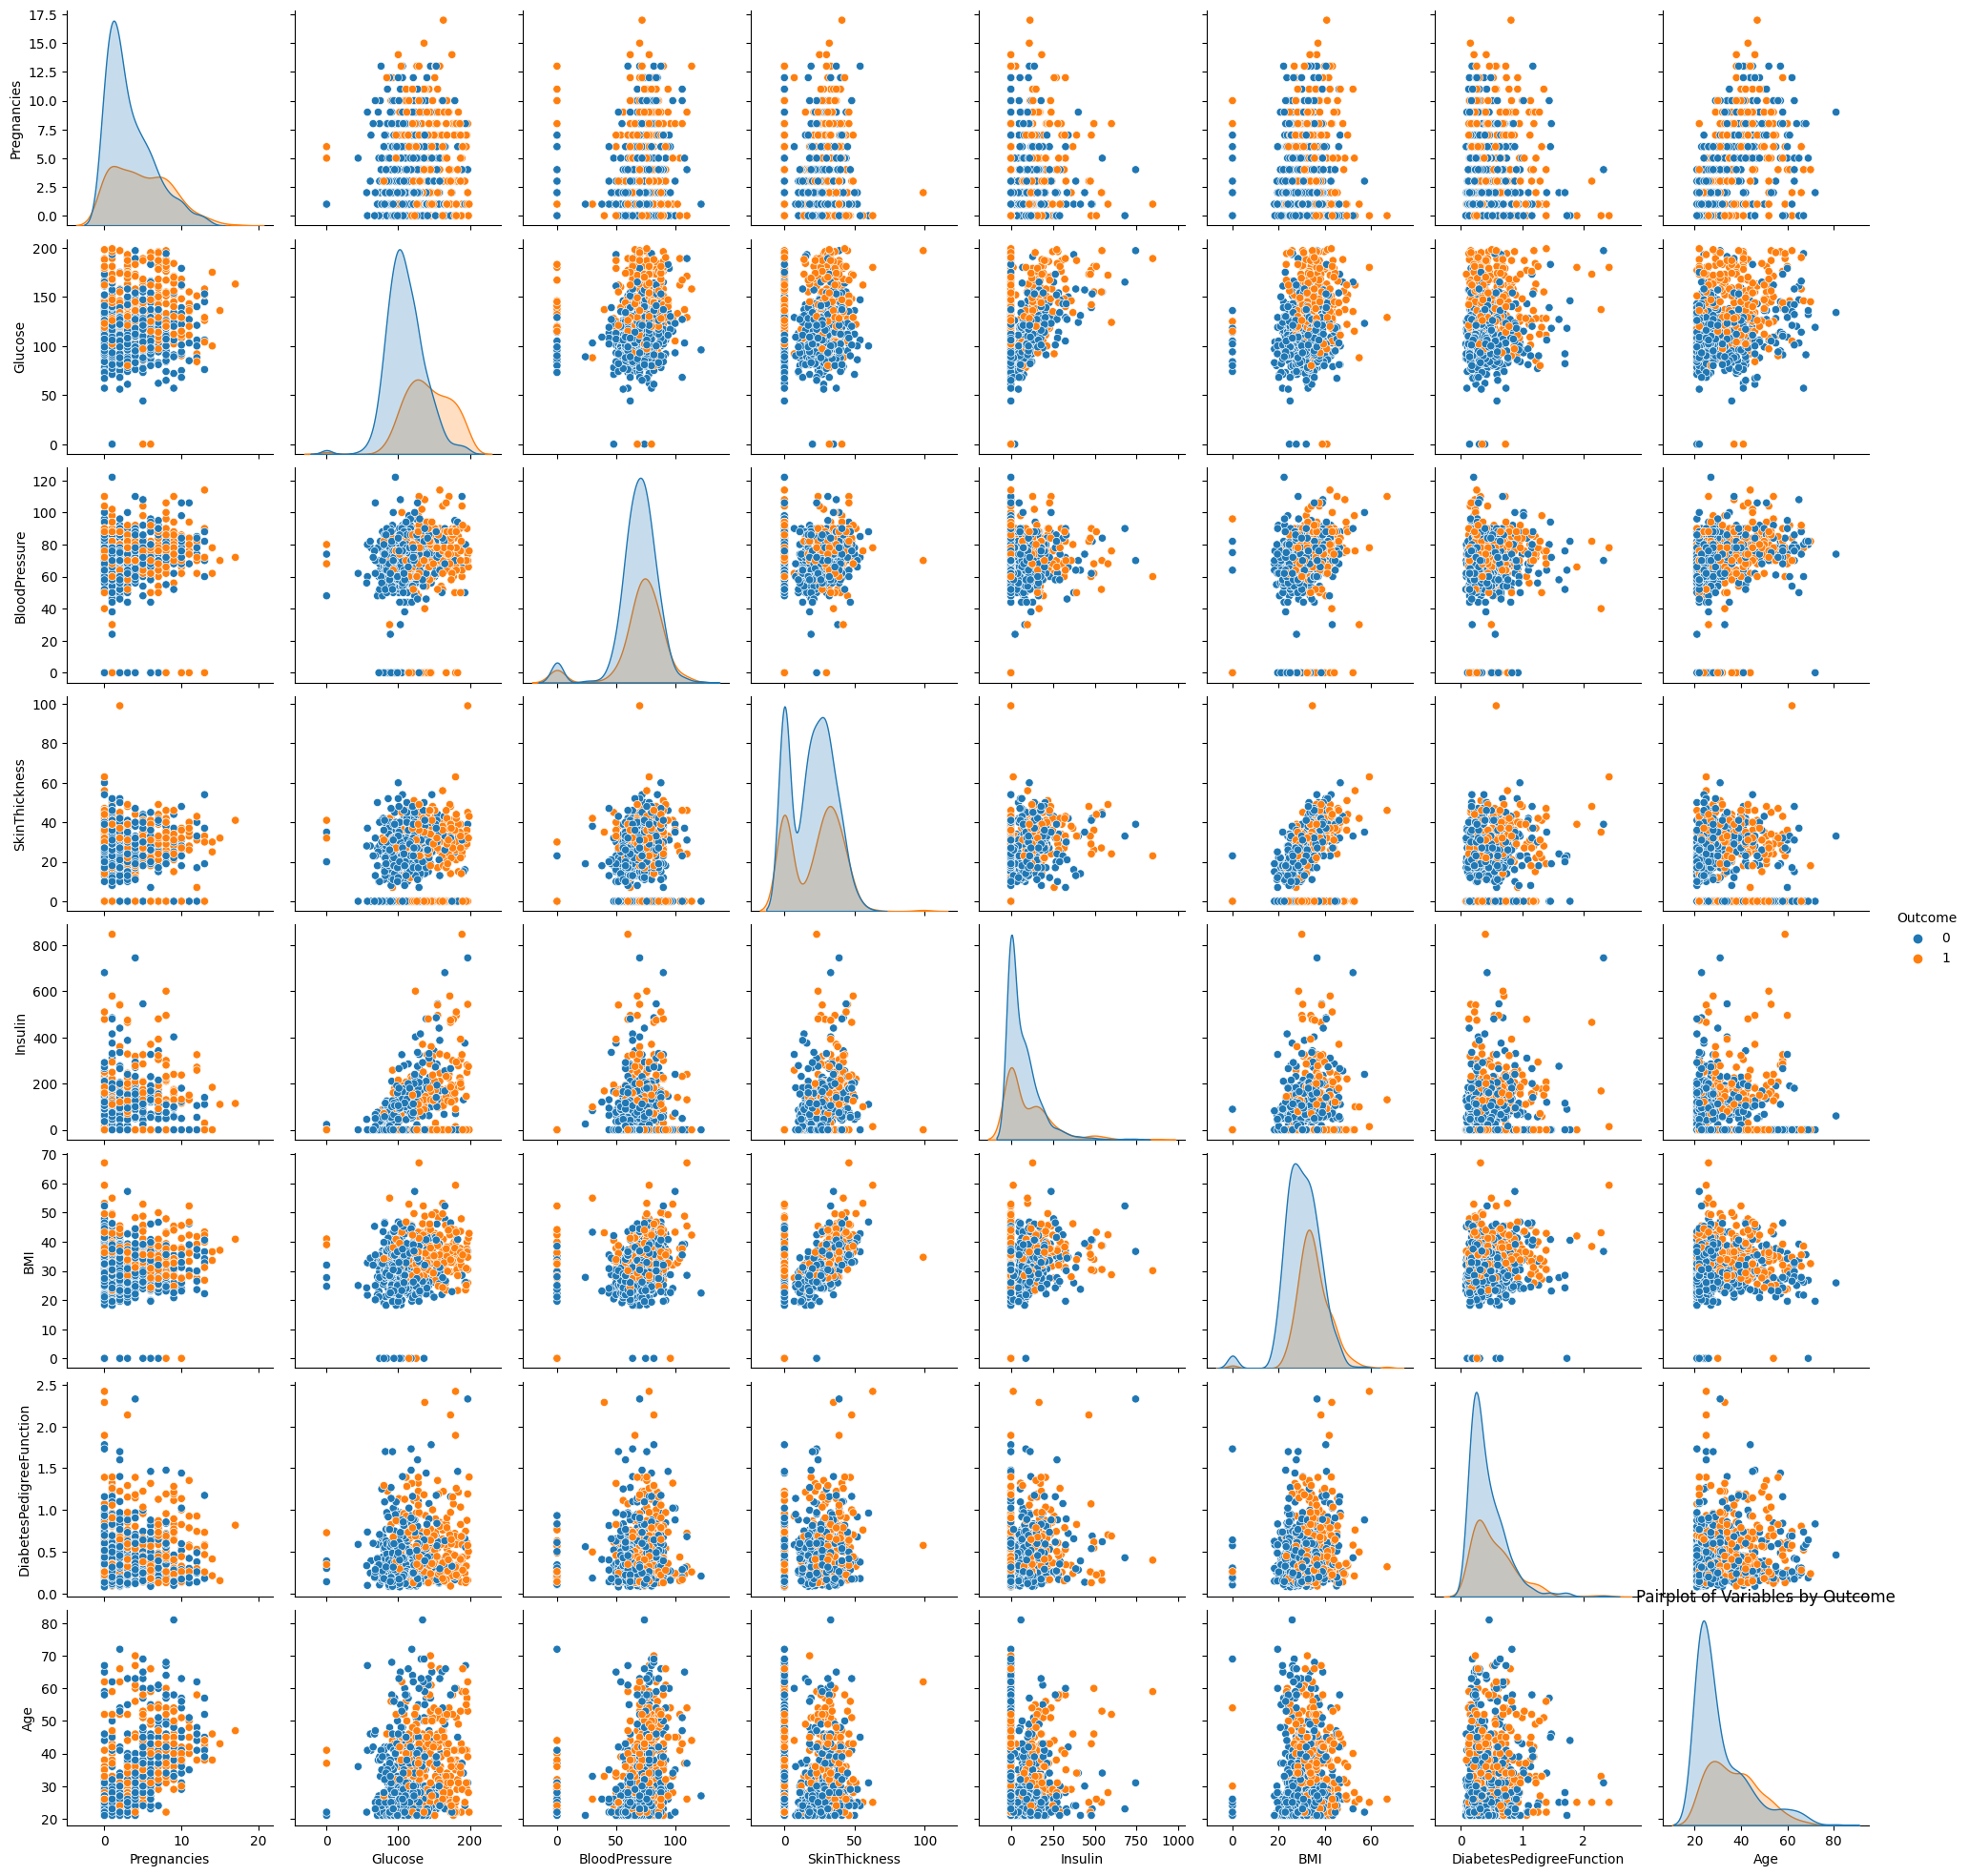

In [94]:
sns.pairplot(df, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome")
plt.title("Pairplot of Variables by Outcome")

<Axes: >

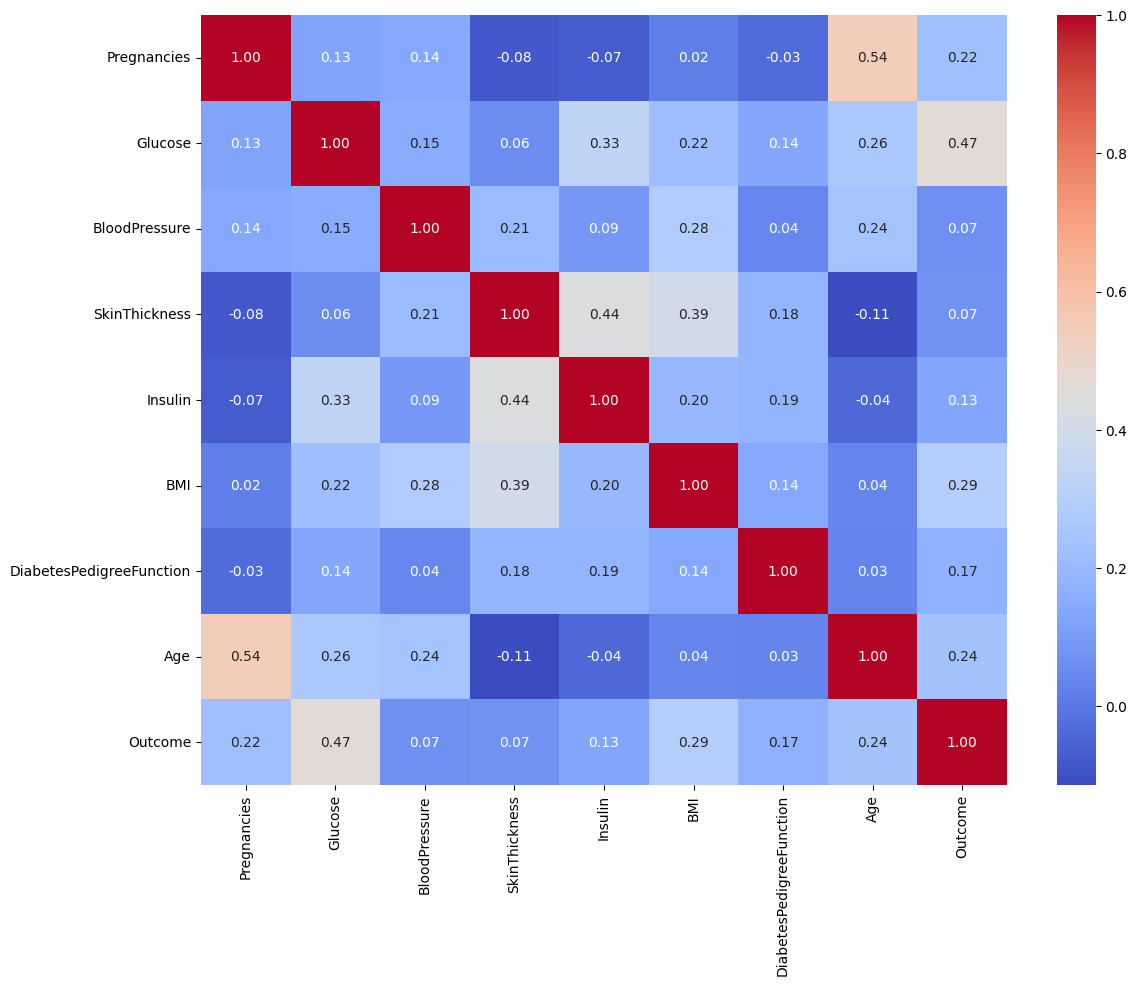

In [23]:
#df.corr()

plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

#features like Pregnancies, Gluecose, BMI, and Age is more correlated with Outcome

In [61]:
train,test=train_test_split(df,shuffle=True,test_size=0.2,random_state=33) #ділення дтасету
# Split the dataset into training and test sets
fig = px.scatter(train, 
          x = 'Glucose',
          y = 'Outcome',
          color='BMI',
          opacity = 0.5)
fig.show()



In [62]:
fig.add_trace(Scatter(x = test['Glucose'],
                     y = test['Outcome'],
                     mode='markers',
                     marker={'color':'red', 'size': 8}))
fig.update_traces(showlegend=False)
fig.show()


In [97]:
mod = LogisticRegression()


result=mod.fit(train[['Glucose','BMI', 'Pregnancies', 'Age','Insulin']],train['Outcome'])




LogisticRegression()



LogisticRegression()

In [102]:
print(mod.coef_)
print(mod.intercept_)
print(mod.classes_)

[[ 0.03472825  0.08868526  0.12439882  0.00770384 -0.00067392]]
[-8.61605279]
[0 1]


In [69]:
y_prediction = mod.predict(test[['Glucose','BMI', 'Pregnancies', 'Age','Insulin']])
print(y_prediction)
test.head()






[0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1
 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
456,1,135,54,0,0,26.7,0.687,62,0
684,5,136,82,0,0,0.0,0.640,69,0
510,12,84,72,31,0,29.7,0.297,46,1
434,1,90,68,8,0,24.5,1.138,36,0
31,3,158,76,36,245,31.6,0.851,28,1


In [81]:
even = test.reset_index(drop=True)
even.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.701299,121.480519,69.766234,19.759740,76.850649,32.253896,0.477955,32.870130,0.357143
std,3.466233,30.734626,16.013390,15.997571,104.433722,6.837652,0.337385,10.739154,0.480721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,103.000000,64.000000,0.000000,0.000000,27.525000,0.218750,24.000000,0.000000
50%,3.000000,117.000000,71.000000,21.000000,0.000000,31.600000,0.386500,29.000000,0.000000
75%,6.000000,141.250000,78.000000,32.000000,135.000000,36.250000,0.690750,41.000000,1.000000
max,17.000000,199.000000,98.000000,54.000000,543.000000,52.900000,2.288000,69.000000,1.000000


In [85]:
y_prediction_df = pd.DataFrame(y_prediction, columns = ['y_prediction'])
y_prediction_df.head()
#y_prediction_df.describe()
even['y_prediction']=y_prediction_df['y_prediction']



In [86]:
even.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,rebounds,y_prediction
0,1,135,54,0,0,26.7,0.687,62,0,0,0
1,5,136,82,0,0,0.0,0.640,69,0,0,0
2,12,84,72,31,0,29.7,0.297,46,1,0,0
3,1,90,68,8,0,24.5,1.138,36,0,0,0
4,3,158,76,36,245,31.6,0.851,28,1,1,1


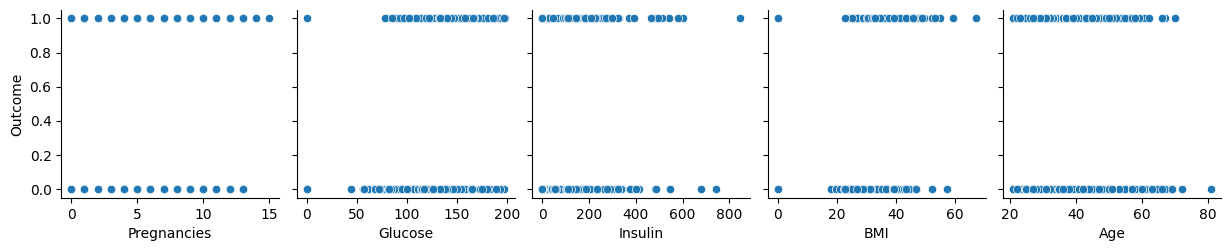

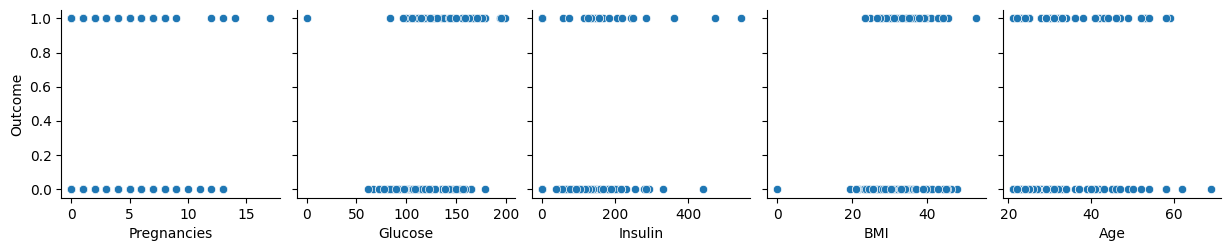

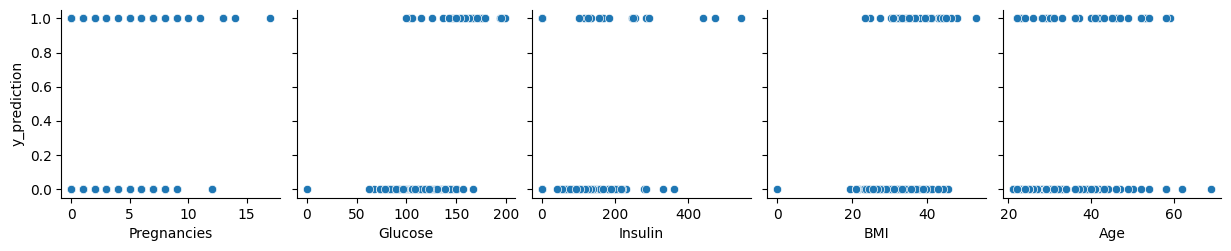

In [88]:
#Visualizing with seaborn 
sns.pairplot(data=train, y_vars = ['Outcome'], x_vars = ['Pregnancies','Glucose','Insulin',
                                                      'BMI','Age'])
sns.pairplot(data=test, y_vars = ['Outcome'], x_vars = ['Pregnancies','Glucose','Insulin',
                                                      'BMI','Age'])
#faul
sns.pairplot(data=even, y_vars = ['y_prediction'], x_vars = ['Pregnancies','Glucose','Insulin',
                                                      'BMI','Age'])




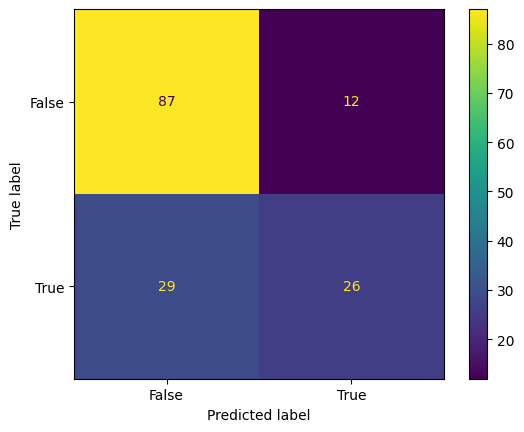

In [89]:

preds = mod.predict(test[['Glucose','BMI', 'Pregnancies', 'Age', 'Insulin']])
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(test['Outcome'],preds)
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])

cm_display.plot()
plt.show()









In [91]:
from sklearn.inspection import DecisionBoundaryDisplay



In [106]:
fig = px.scatter(train, 
          x = 'Glucose',
          y = 'BMI',
          color='Outcome',
          opacity = 0.5)
fig.show()

fig.add_trace(Scatter(x = train['Glucose'],
                     y = -train['Glucose']*mod.coef_[0][0] / mod.coef_[0][1] - mod.intercept_[0],
                     showlegend=False))




# Create the 3D surface plot
#fig = Figure(data=[Surface(x='Glucose', y='BMI', z='Outcome')])
#t1 = df[df['label']==0]
#t2 = df[df['label']==1]
#fig.add_trace(Scatter3d(x=t1['f1'],y=t1['f2'],z=t1['z'],mode='markers'))
#fig.add_trace(Scatter3d(x=t2['f1'],y=t2['f2'],z=t2['z'],mode='markers'))

# Set the layout for the plot
#fig.update_layout(title='3D Surface Plot', autosize=False,
     #             width=1000, height=1000,
      #            margin=dict(l=65, r=50, b=65, t=90))

# Show the plot
#fig.show()




#df['z'] = df['f1']*mod.coef_[0][0] + df['f2']*mod.coef_[0][1] + mod.intercept_
#df['s'] = 1/(1 + np.exp(-df['z']))
# Define the x and y coordinates
#x = np.linspace(-2, 2, 100)
#y = np.linspace(-2, 2, 100)

# Create a meshgrid from the x and y coordinates
#X, Y = np.meshgrid(x, y)

